# Video Game Sales And Engagement Analysis

## Analysis of video game dataset

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import re
import ast

In [2]:
#Reading csv data
data_vgames=pd.read_csv("vgsales.csv")

In [3]:
data_vgames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data_vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#Spliting numerial and categorical columns 
datavg_num=data_vgames.select_dtypes("number")
datavg_cat=data_vgames.select_dtypes("object")

In [6]:
datavg_num.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


In [7]:
datavg_cat.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [8]:
#Check if any duplicate values are there
datavg_num.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [9]:
#Remove null values
datavg_num.isna().sum()

Rank              0
Year            271
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
median=datavg_num['Year'].median()
datavg_num['Year']=datavg_num['Year'].fillna(median)

In [11]:
datavg_num.isna().sum()

Rank            0
Year            0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
datavg_cat.duplicated().sum()

np.int64(4)

In [13]:
datavg_cat[datavg_cat.duplicated()]

,Name,Platform,Genre,Publisher
1530,Need for Speed: Most Wanted,X360,Racing,Electronic Arts
11676,Need for Speed: Most Wanted,PC,Racing,Electronic Arts
14999,Wii de Asobu: Metroid Prime,Wii,Shooter,Nintendo
16127,Madden NFL 13,PS3,Sports,Electronic Arts


In [14]:
#Now checking null values for categorial values
datavg_cat.isna().sum()

Name          0
Platform      0
Genre         0
Publisher    58
dtype: int64

In [15]:
datavg_cat['Publisher']=datavg_cat['Publisher'].fillna(datavg_cat['Publisher'].mode()[0])

In [16]:
datavg_cat['Publisher'].isna().sum()

np.int64(0)

In [17]:
datavg_cat.isna().sum()

Name         0
Platform     0
Genre        0
Publisher    0
dtype: int64

In [18]:
def categorialTreatment(s):
    text= s.astype(str).str.lower().str.strip()
    text= text.apply(lambda x: re.sub(r"[^a-zA-Z0-9]","",x))
    return text

for i in ["Name","Platform","Genre","Publisher"]:
    datavg_cat[i]=categorialTreatment(datavg_cat[i])

In [19]:
datavg_merged= pd.merge(datavg_num,datavg_cat ,how="inner",left_index=True,right_index=True)

In [20]:
datavg_merged



,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,wiisports,wii,sports,nintendo
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,supermariobros,nes,platform,nintendo
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,mariokartwii,wii,racing,nintendo
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,wiisportsresort,wii,sports,nintendo
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,pokemonredpokemonblue,gb,roleplaying,nintendo
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,2002.0,0.01,0.00,0.00,0.00,0.01,woodywoodpeckerincrazycastle5,gba,platform,kemco
16594,16597,2003.0,0.01,0.00,0.00,0.00,0.01,meninblackiialienescape,gc,shooter,infogrames
16595,16598,2008.0,0.00,0.00,0.00,0.00,0.01,scoreinternationalbaja1000theofficialgame,ps2,racing,activision
16596,16599,2010.0,0.00,0.01,0.00,0.00,0.01,knowhow2,ds,puzzle,7games


In [21]:
datavg_merged.isna().sum()

Rank            0
Year            0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
Name            0
Platform        0
Genre           0
Publisher       0
dtype: int64

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_12128\1742064641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_totals.index, y=region_totals.values, palette="viridis")


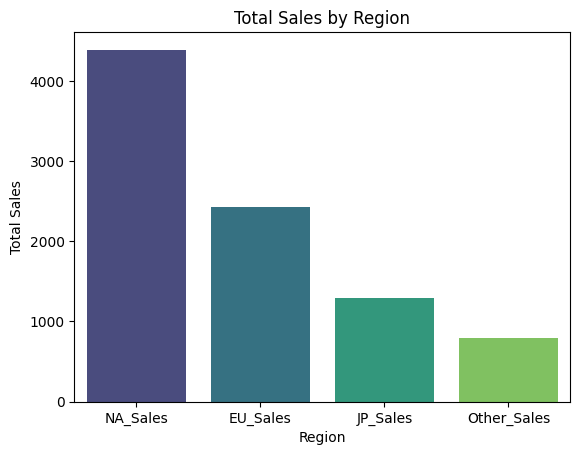

In [22]:
#1.🌍 Which region generates the most game sales?
region_totals = datavg_merged[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
print(region_totals)
sns.barplot(x=region_totals.index, y=region_totals.values, palette="viridis")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

   Platform  Global_Sales
0       wii         82.74
1       nes         40.24
4        gb         31.37
6        ds         30.01
15     x360         21.82
16      ps3         21.40
17      ps2         20.81
18     snes         20.61
25      gba         15.85
32      3ds         14.35

C:\Users\Admin\AppData\Local\Temp\ipykernel_12128\4109868757.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_Selling["Platform"],y=best_Selling["Global_Sales"],palette="viridis")


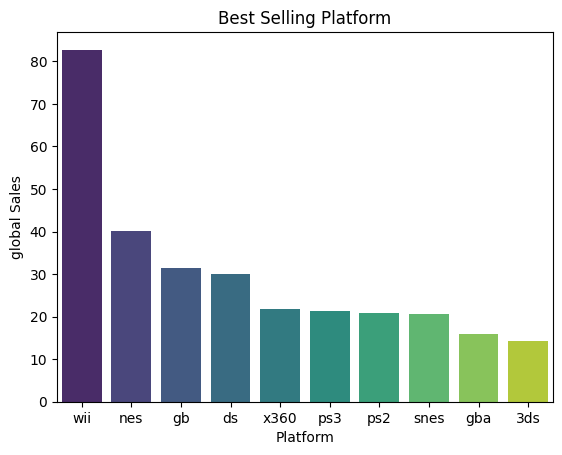

In [23]:
#2.What are the best-selling platforms?
best_Selling=datavg_merged[["Platform","Global_Sales"]].sort_values(by="Global_Sales",ascending=False).drop_duplicates(subset="Platform").head(10)
print(best_Selling)
sns.barplot(x=best_Selling["Platform"],y=best_Selling["Global_Sales"],palette="viridis")
plt.title("Best Selling Platform")
plt.xlabel("Platform")
plt.ylabel("global Sales")
plt.show()


In [24]:
datavg_merged.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,wiisports,wii,sports,nintendo
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,supermariobros,nes,platform,nintendo
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,mariokartwii,wii,racing,nintendo
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,wiisportsresort,wii,sports,nintendo
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,pokemonredpokemonblue,gb,roleplaying,nintendo


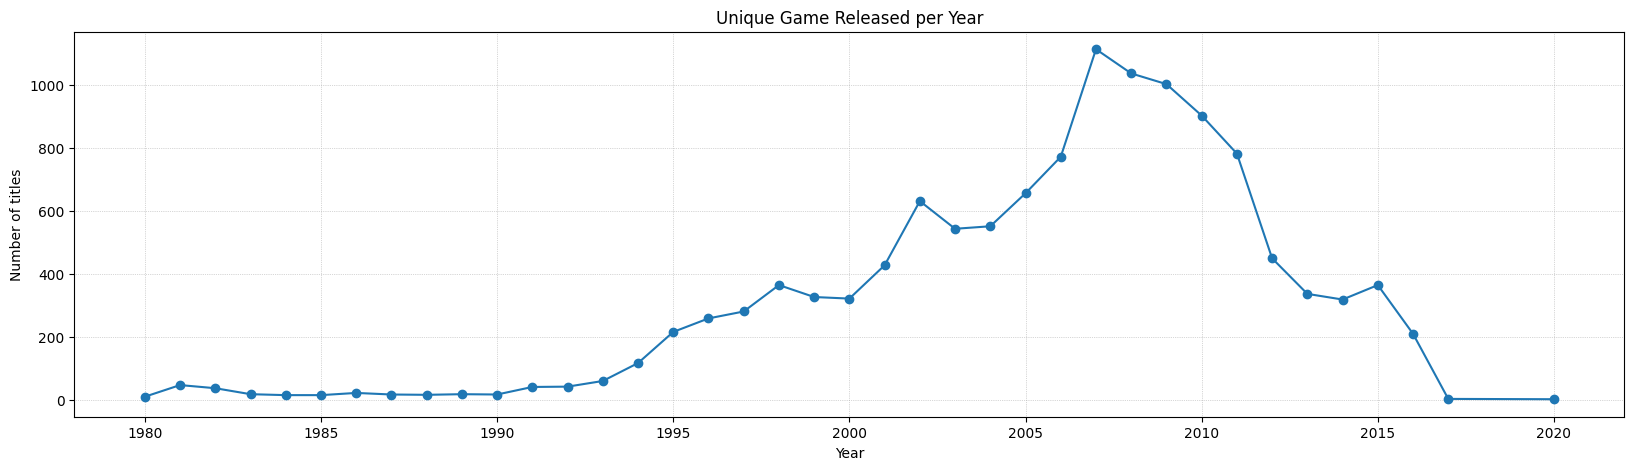

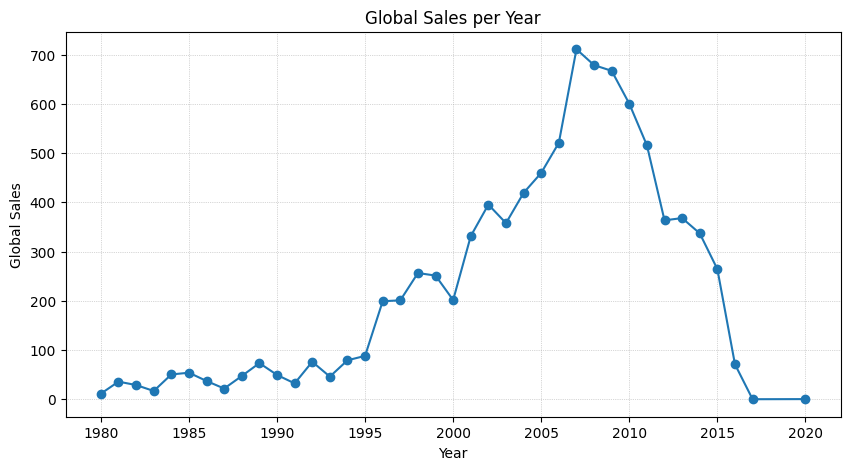

In [25]:
#3.What’s the trend of game releases and sales over years?
releases_per_year = datavg_merged.groupby("Year")["Name"].nunique()
sales_per_year = datavg_merged.groupby("Year")["Global_Sales"].sum()
trend_df = pd.concat([releases_per_year, sales_per_year], axis=1).reset_index()

plt.figure(figsize=(20,5))
plt.plot(trend_df["Year"], trend_df["Name"], marker='o')
plt.title("Unique Game Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of titles")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(trend_df["Year"], trend_df["Global_Sales"], marker='o')
plt.title("Global Sales per Year")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

In [26]:
datavg_merged.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,wiisports,wii,sports,nintendo
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,supermariobros,nes,platform,nintendo
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,mariokartwii,wii,racing,nintendo
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,wiisportsresort,wii,sports,nintendo
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,pokemonredpokemonblue,gb,roleplaying,nintendo


Publisher
nintendo                      1786.56
electronicarts                1125.20
activision                     727.46
sonycomputerentertainment      607.50
ubisoft                        474.72
taketwointeractive             399.54
thq                            340.77
konamidigitalentertainment     283.64
sega                           272.99
namcobandaigames               254.09
Name: Global_Sales, dtype: float64


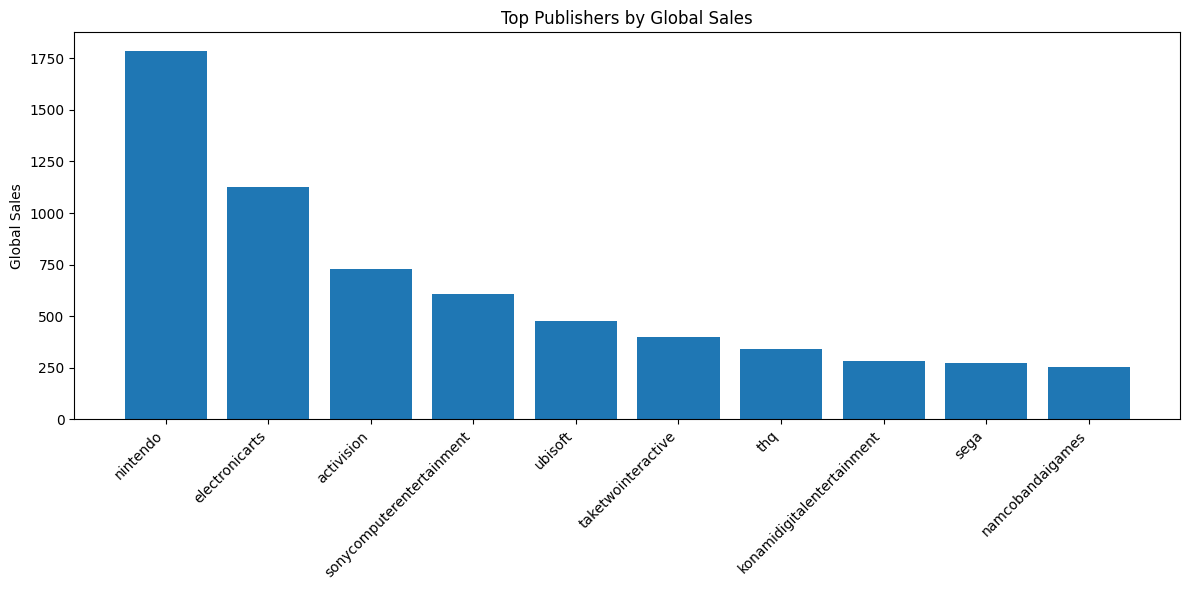

In [27]:
#4. Who are the top publishers by sales?
publisher_sales = datavg_merged.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10)
print(publisher_sales)
plt.figure(figsize=(12,6))
plt.bar(publisher_sales.index, publisher_sales.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top Publishers by Global Sales")
plt.ylabel("Global Sales")
plt.tight_layout()
plt.show()

Name
wiisports                   82.74
grandtheftautov             55.92
supermariobros              45.31
tetris                      35.84
mariokartwii                35.82
wiisportsresort             33.00
pokemonredpokemonblue       31.37
callofdutyblackops          31.03
callofdutymodernwarfare3    30.83
newsupermariobros           30.01
Name: Global_Sales, dtype: float64


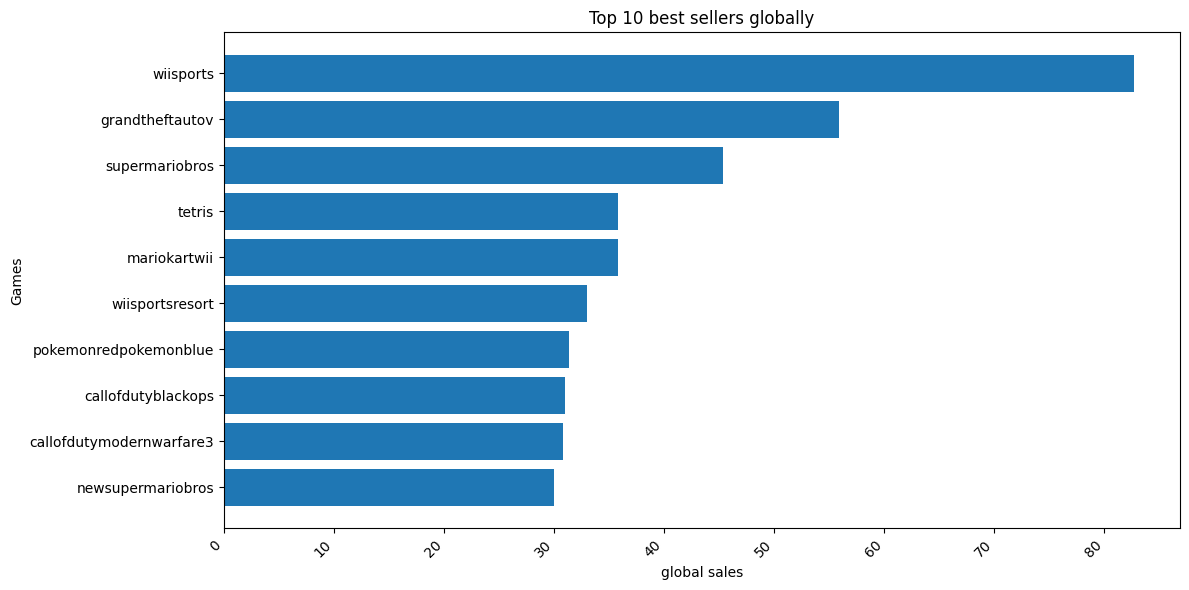

In [28]:
#5.Which games are the top 10 best-sellers globally?
top10_games = datavg_merged.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False).head(10)
print(top10_games)
plt.figure(figsize=(12,6))
plt.barh(top10_games.index, top10_games.values)
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.title("Top 10 best sellers globally")
plt.ylabel("Games")
plt.xlabel("global sales")
plt.tight_layout()
plt.show()


In [29]:
datavg_merged.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,wiisports,wii,sports,nintendo
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,supermariobros,nes,platform,nintendo
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,mariokartwii,wii,racing,nintendo
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,wiisportsresort,wii,sports,nintendo
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,pokemonredpokemonblue,gb,roleplaying,nintendo


          NA_Sales  EU_Sales  JP_Sales  Other_Sales
Platform                                           
2600         90.60      5.47      0.00         0.91
3do           0.00      0.00      0.10         0.00
3ds          78.87     58.52     97.35        12.63
dc            5.43      1.69      8.56         0.27
ds          390.71    194.65    175.57        60.53
gb          114.32     47.82     85.12         8.20
gba         187.54     75.25     47.33         7.73
gc          133.46     38.71     21.58         5.18
gen          19.27      5.52      2.67         0.89
gg            0.00      0.00      0.04         0.00
n64         139.02     41.06     34.22         4.38
nes         125.94     21.15     98.65         5.31
ng            0.00      0.00      1.44         0.00
pc           93.28    139.68      0.17        24.86
pcfx          0.00      0.00      0.03         0.00
ps          336.51    213.60    139.82        40.91
ps2         583.84    339.29    139.20       193.44
ps3         

<Figure size 1200x1000 with 0 Axes>

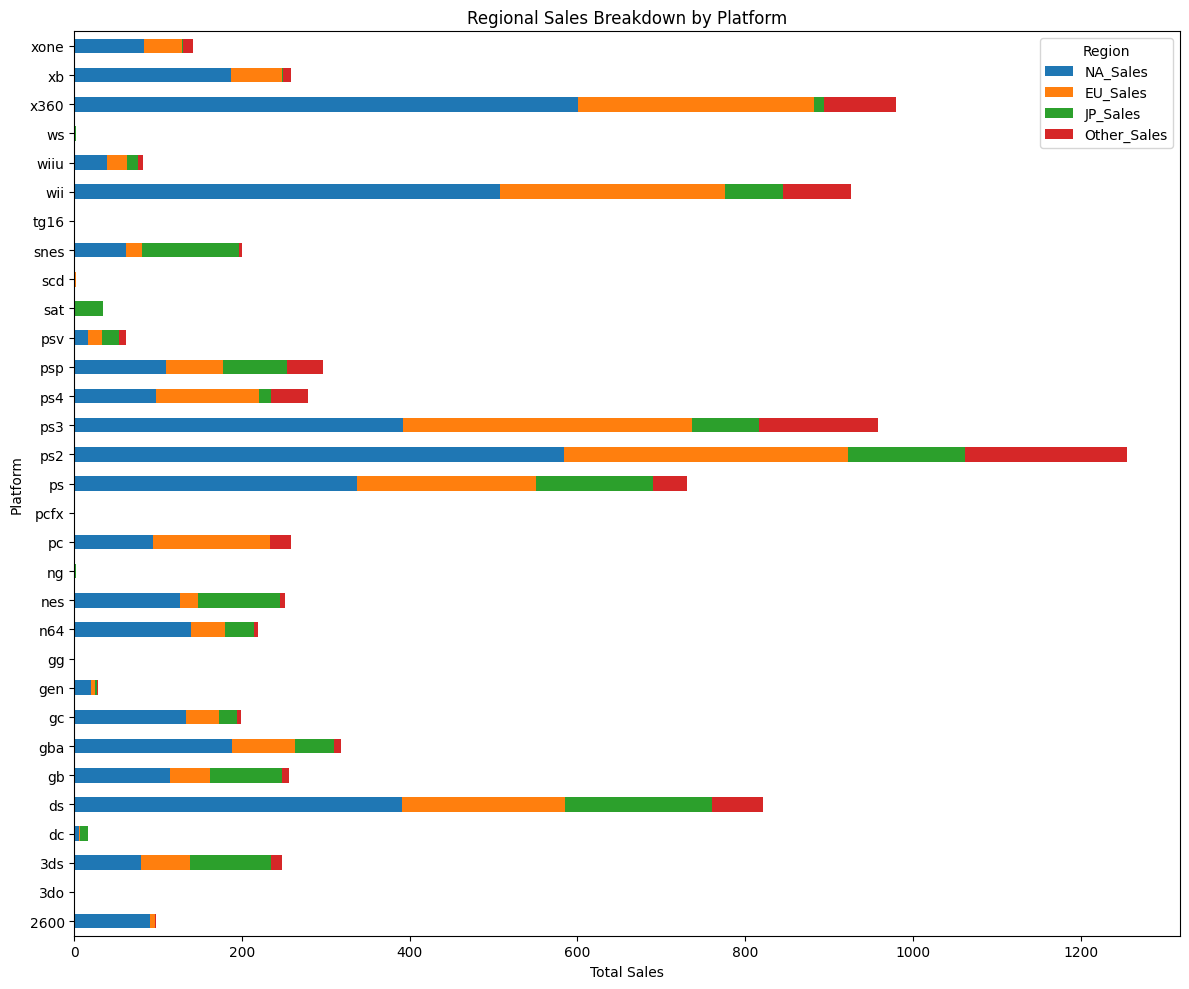

In [30]:
#6. How do regional sales compare for specific platforms?
platform_region = datavg_merged.groupby("Platform")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
print(platform_region)
# Create the stacked bar plot
plt.figure(figsize=(12, 10))
platform_region.plot(kind='barh',stacked=True,figsize=(12, 10), title="Regional Sales Breakdown by Platform")
plt.xlabel("Total Sales")
plt.ylabel("Platform")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

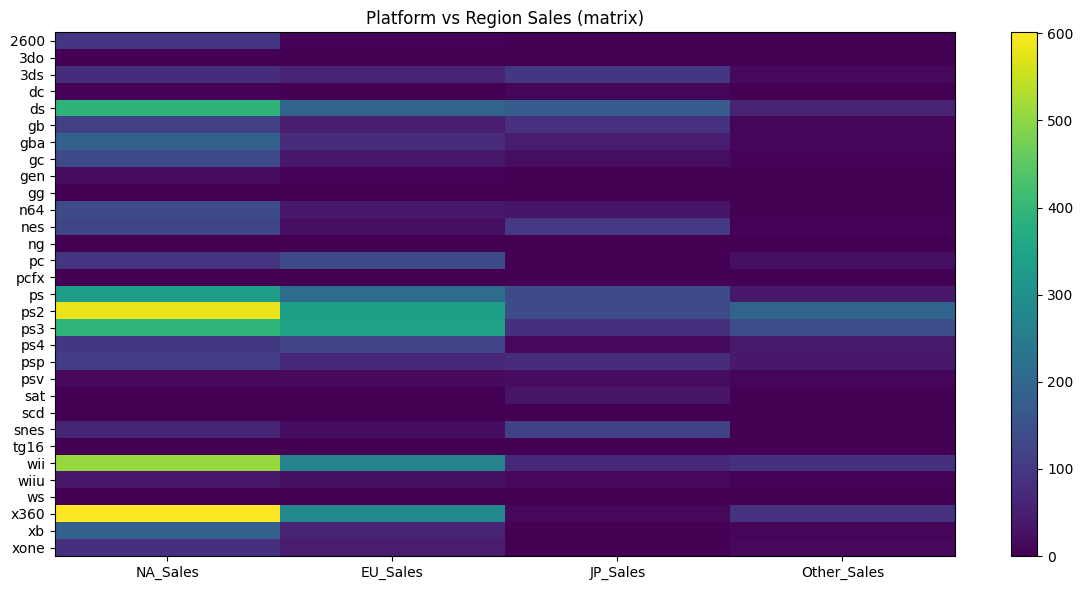

In [31]:
platform_region = datavg_merged.groupby("Platform")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()

plt.figure(figsize=(12,6))
arr = platform_region.values
plt.imshow(arr, aspect='auto', interpolation='nearest')
plt.yticks(np.arange(len(platform_region.index)), platform_region.index)
plt.xticks(np.arange(len(platform_region.columns)), platform_region.columns)
plt.colorbar()
plt.title("Platform vs Region Sales (matrix)")
plt.tight_layout()
plt.show()

Platform   2600  3do  3ds   dc   ds   gb  gba   gc  gen   gg  ...  sat  scd  \
Year                                                          ...             
1980.0    11.38  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1981.0    35.77  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1982.0    28.86  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1983.0     5.83  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1984.0     0.27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

Platform  snes  tg16  wii  wiiu   ws  x360   xb  xone  
Year                                                   
1980.0     0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  
1981.0     0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  
1982.0     0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  
1983.0     0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  
1984.0     0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  

[5 rows x 31 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_12128\1001567859.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


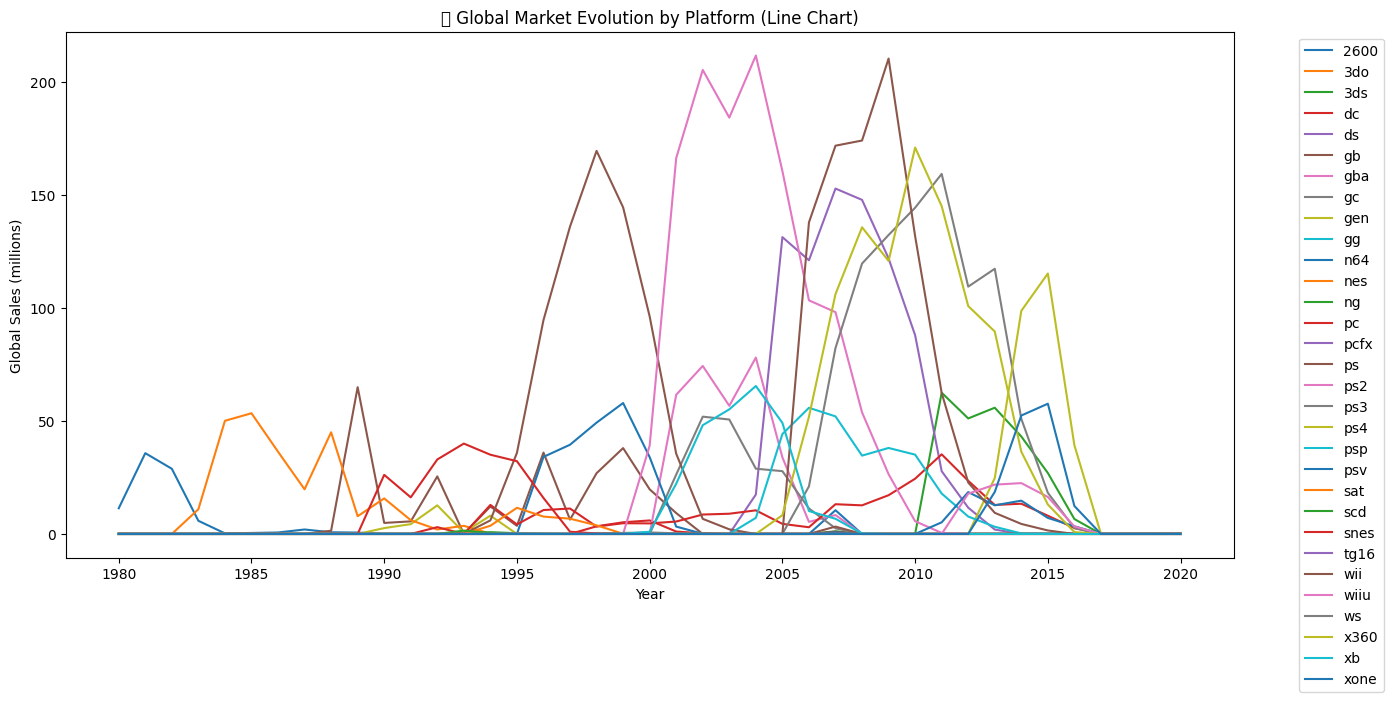

In [32]:
#7.📈 How has the market evolved by platform over time?
pivot_year_platform =datavg_merged.groupby(["Year", "Platform"])["Global_Sales"].sum().unstack(fill_value=0)#platforms become column if we us use stack,Some years don’t have sales for some platforms replace nan with zero
years = pivot_year_platform.index.values
platforms = pivot_year_platform.columns.tolist()
print(pivot_year_platform.head())
plt.figure(figsize=(14,7))

for platform in platforms:
    plt.plot(years, pivot_year_platform[platform].values, label=platform)

plt.legend(loc="upper left", bbox_to_anchor=(1.05,1))
plt.title("📈 Global Market Evolution by Platform (Line Chart)")
plt.xlabel("Year")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.show()

In [33]:
datavg_merged.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,wiisports,wii,sports,nintendo
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,supermariobros,nes,platform,nintendo
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,mariokartwii,wii,racing,nintendo
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,wiisportsresort,wii,sports,nintendo
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,pokemonredpokemonblue,gb,roleplaying,nintendo


             NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                 
action         877.83    525.00    159.95       187.38
adventure      105.80     64.13     52.07        16.81
fighting       223.59    101.32     87.35        36.68
misc           410.24    215.98    107.76        75.32
platform       447.05    201.63    130.77        51.59
puzzle         123.78     50.78     57.31        12.55
racing         359.42    238.39     56.69        77.27
roleplaying    327.28    188.06    352.31        59.61
shooter        582.60    313.27     38.28       102.69
simulation     183.31    113.38     63.70        31.52
sports         683.35    376.85    135.37       134.97
strategy        68.70     45.34     49.46        11.36


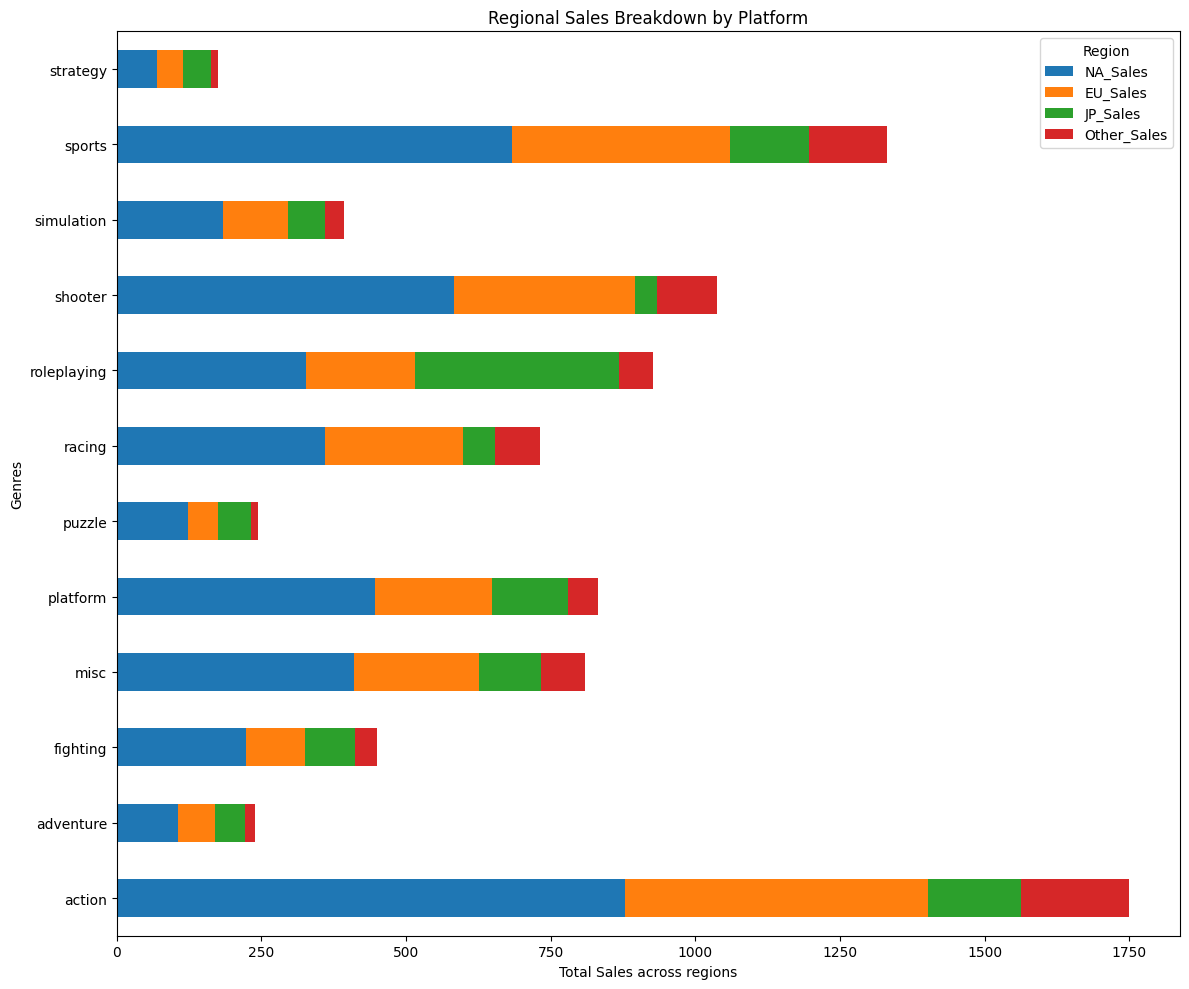

In [ ]:
#8.📍 What are the regional genre preferences?
genre_region = datavg_merged.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
print(genre_region)
genre_region.plot(kind='barh',stacked=True,figsize=(12, 10), title="Regional Sales Breakdown by Platform")
plt.xlabel("Total Sales across regions")
plt.ylabel("Genres")
plt.legend(title="Region")
plt.tight_layout()
plt.show()



In [35]:
datavg_merged.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,wiisports,wii,sports,nintendo
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,supermariobros,nes,platform,nintendo
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,mariokartwii,wii,racing,nintendo
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,wiisportsresort,wii,sports,nintendo
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,pokemonredpokemonblue,gb,roleplaying,nintendo


        NA_Sales  EU_Sales  JP_Sales  Other_Sales
Year                                             
1980.0     10.59      0.67      0.00         0.12
1981.0     33.40      1.96      0.00         0.32
1982.0     26.92      1.65      0.00         0.31
1983.0      7.76      0.80      8.10         0.14
1984.0     33.28      2.10     14.27         0.70
1985.0     33.73      4.74     14.56         0.92
1986.0     12.50      2.84     19.81         1.93
1987.0      8.46      1.41     11.63         0.20
1988.0     23.87      6.59     15.76         0.99
1989.0     45.15      8.44     18.36         1.50
1990.0     25.46      7.63     14.88         1.40
1991.0     12.76      3.95     14.78         0.74
1992.0     33.87     11.71     28.91         1.65
1993.0     15.12      4.65     25.33         0.89
1994.0     28.15     14.88     33.99         2.20
1995.0     24.82     14.90     45.75         2.64
1996.0     86.76     47.26     57.44         7.69
1997.0     94.75     48.32     48.87         9.13


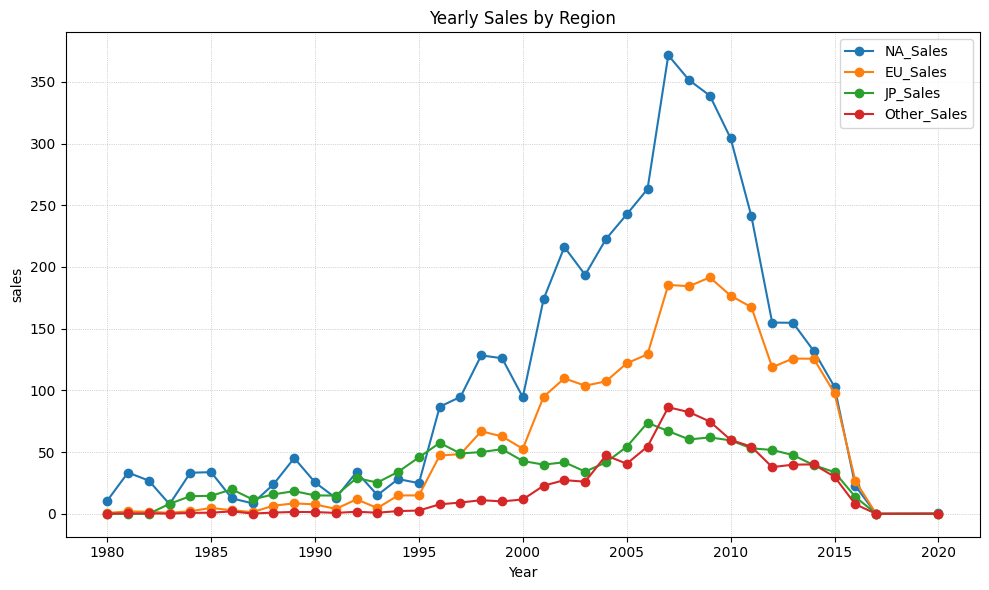

In [36]:
#9.🔄 What’s the yearly sales change per region?
yearly_sales = datavg_merged.groupby("Year")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum()
print(yearly_sales)
plt.figure(figsize=(10,6))
for c in yearly_sales.columns:
    plt.plot(yearly_sales.index, yearly_sales[c], marker='o', label=c)
plt.legend()
plt.title("Yearly Sales by Region")
plt.xlabel("Year")
plt.ylabel("sales")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()


Publisher
palcom                             4.170000
redorb                             2.620000
nintendo                           2.541337
arenaentertainment                 2.360000
uepsystems                         2.250000
redoctane                          2.170000
valve                              1.740000
hellogames                         1.600000
sonycomputerentertainmenteurope    1.592667
westwoodstudios                    1.550000
Name: Global_Sales, dtype: float64


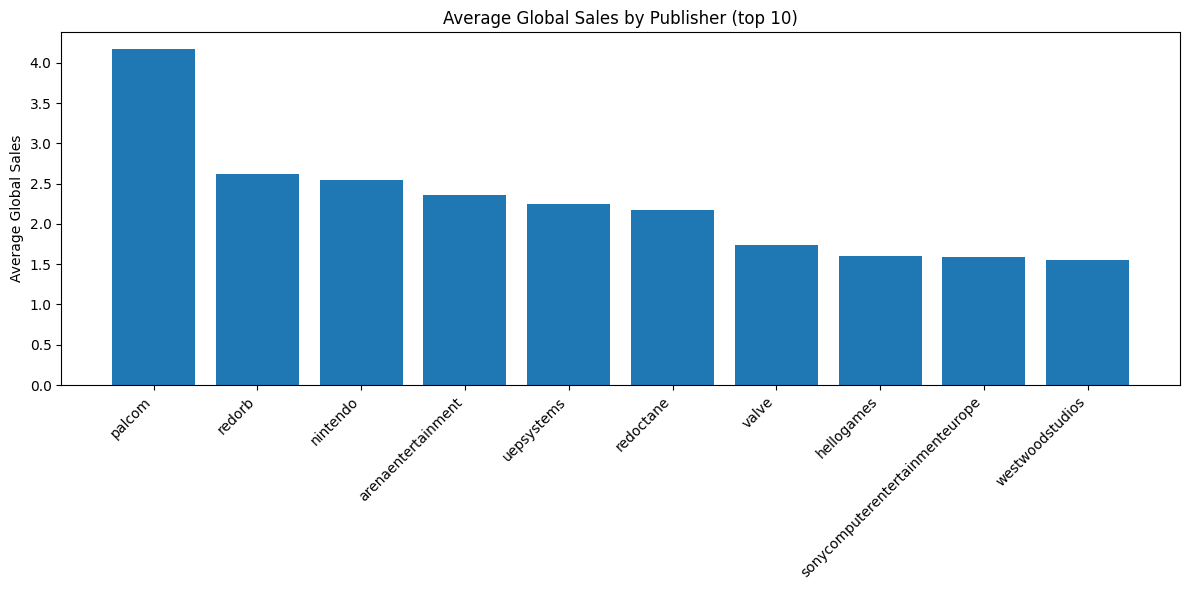

In [37]:
#10.🧮 What is the average sales per publisher?
avg_sales_publisher = datavg_merged.groupby("Publisher")["Global_Sales"].mean().sort_values(ascending=False).head(10)
print(avg_sales_publisher)
plt.figure(figsize=(12,6))
plt.bar(avg_sales_publisher.index, avg_sales_publisher.values)
plt.xticks(rotation=45, ha='right')
plt.title("Average Global Sales by Publisher (top 10)")
plt.ylabel("Average Global Sales")
plt.tight_layout()
plt.show()

In [38]:
datavg_merged.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name,Platform,Genre,Publisher
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,wiisports,wii,sports,nintendo
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,supermariobros,nes,platform,nintendo
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,mariokartwii,wii,racing,nintendo
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,wiisportsresort,wii,sports,nintendo
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,pokemonredpokemonblue,gb,roleplaying,nintendo


    Platform                       Name  Global_Sales
0       2600                     pacman          7.81
1       2600                    pitfall          4.50
2       2600                  asteroids          4.31
3       2600             missilecommand          2.76
4       2600              spaceinvaders          2.53
..       ...                        ...           ...
137     xone        callofdutyblackops3          7.30
138     xone  callofdutyadvancedwarfare          5.13
139     xone            grandtheftautov          5.08
140     xone             halo5guardians          4.26
141     xone                   fallout4          4.09

[142 rows x 3 columns]


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Admin\AppData\Local\Programs\Python\Python313\

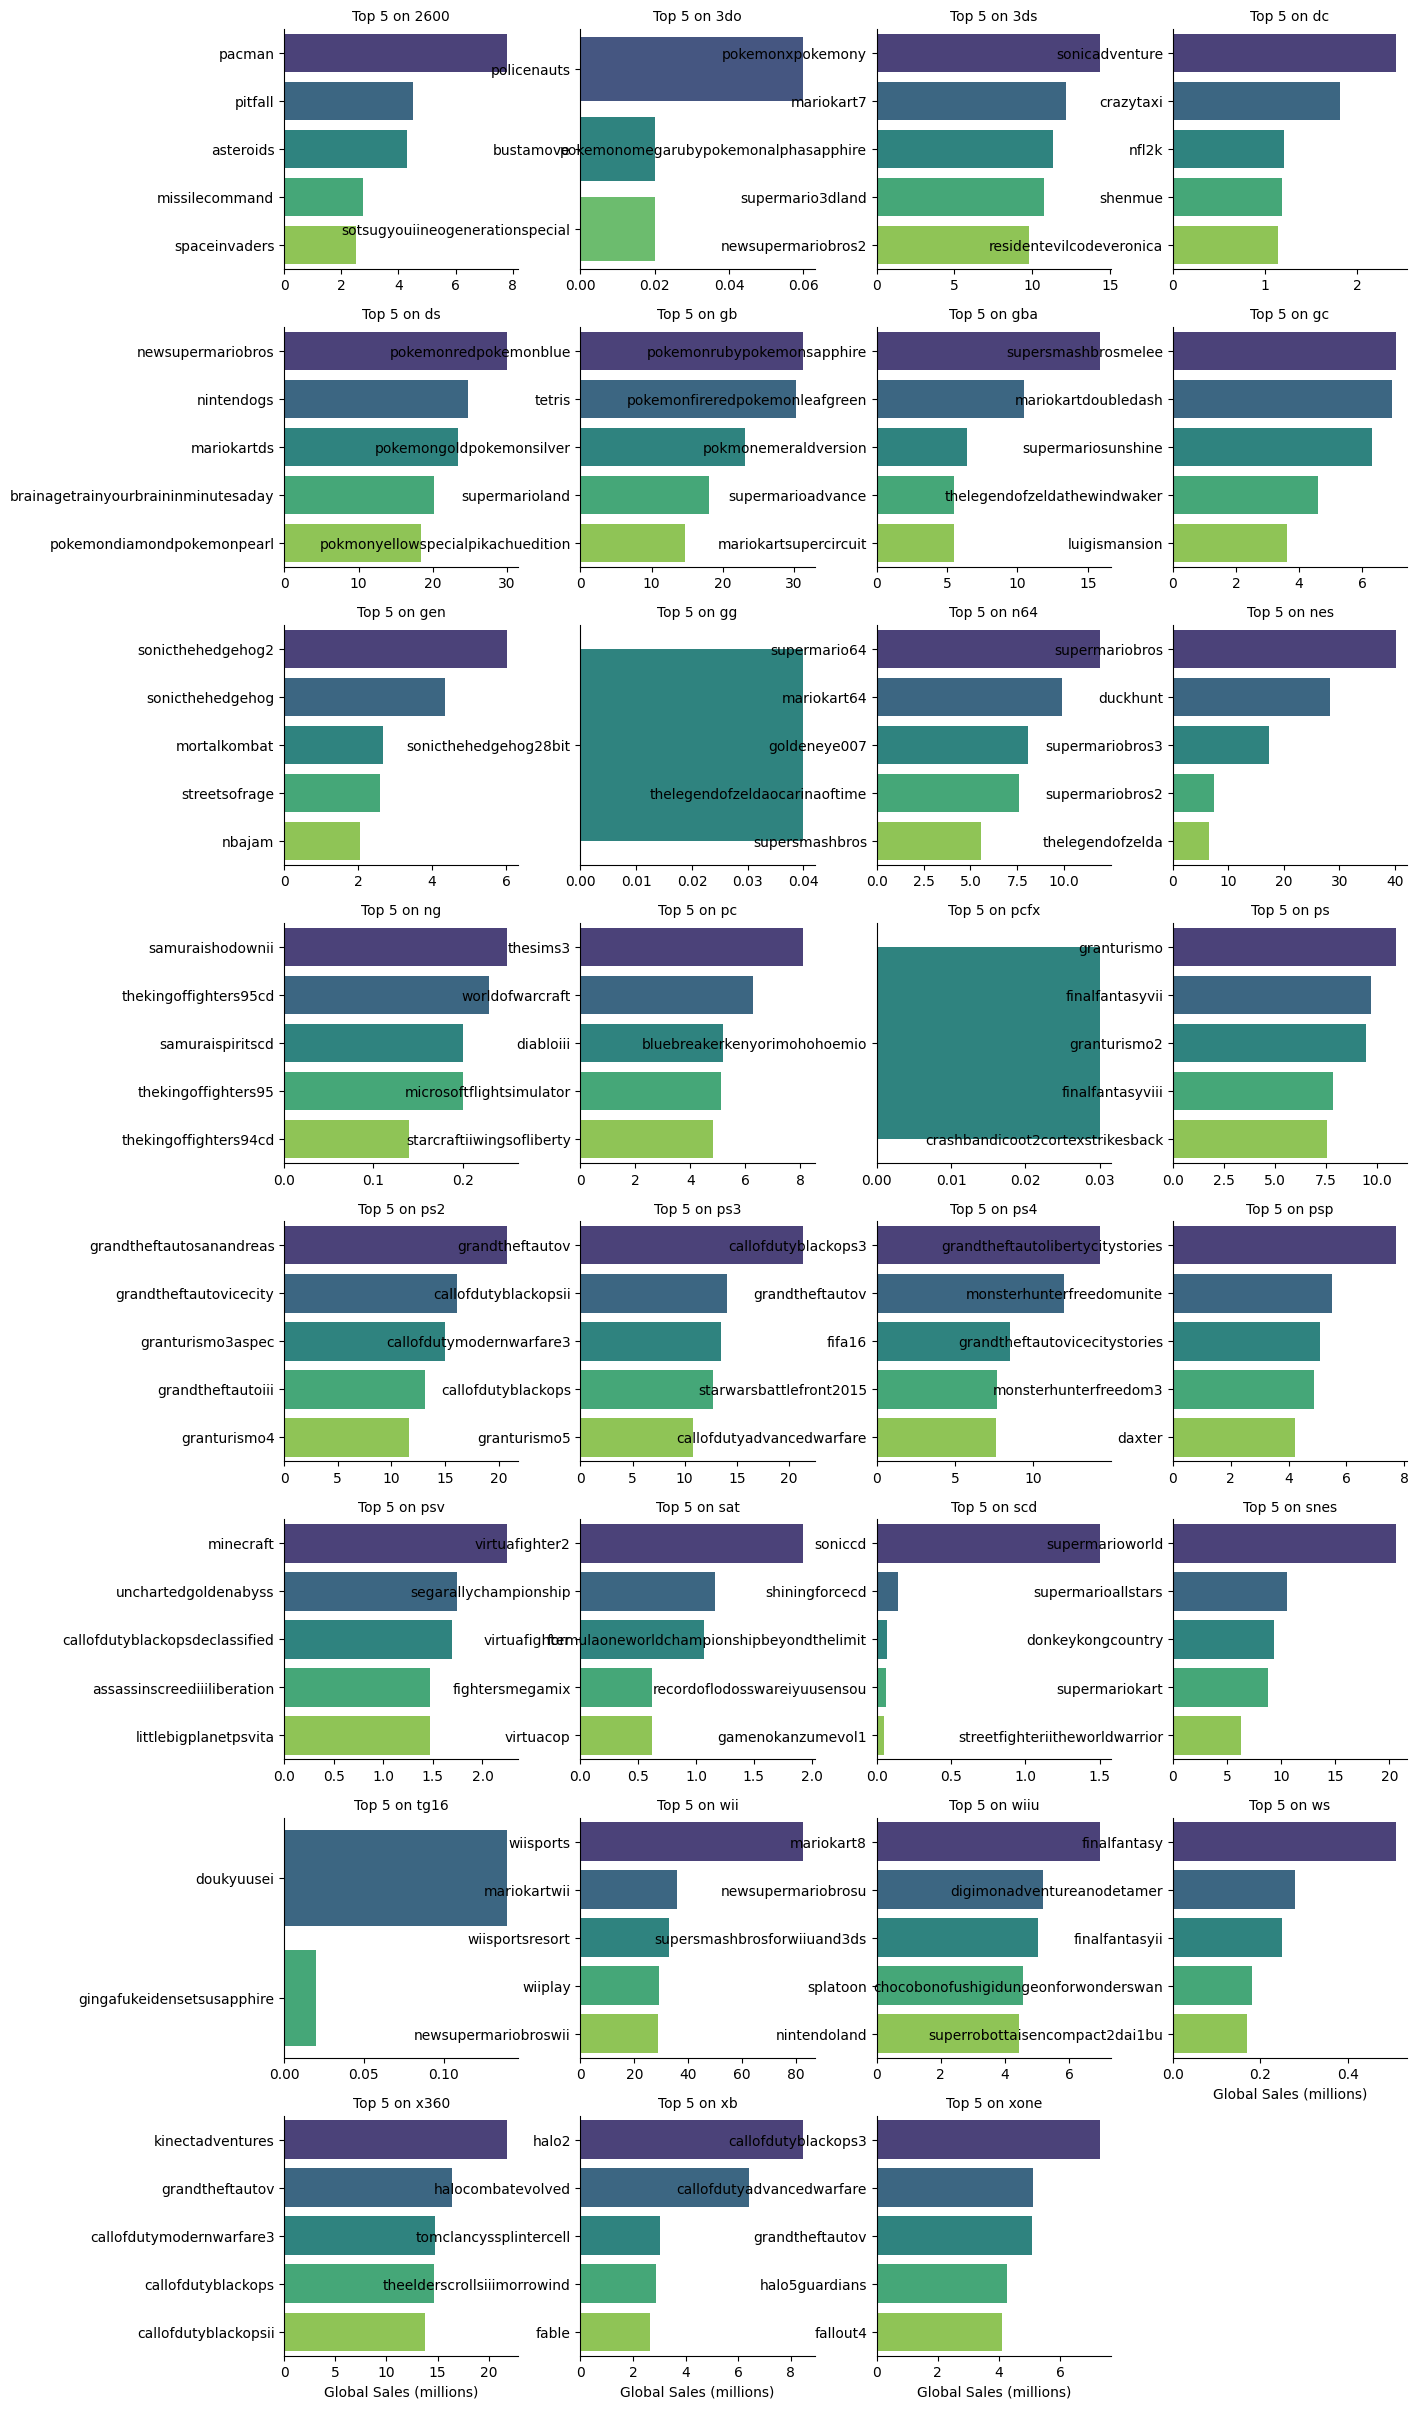

In [39]:
#11.🏆 What are the top 5 best-selling games per platform?
top5_per_platform = (datavg_merged.groupby(["Platform","Name"], as_index=False)["Global_Sales"].sum().sort_values(["Platform","Global_Sales"], ascending=[True, False]))
top5_by_platform = (top5_per_platform.groupby("Platform").head(5).reset_index(drop=True))#top 5 per platform ,reset_index=starting from zero index and deleting onlt index
print(top5_by_platform)
g = sns.FacetGrid(top5_by_platform, col="Platform", col_wrap=4, sharex=False, sharey=False, height=3)
g.map_dataframe(sns.barplot, x="Global_Sales",  y="Name", order=None, palette="viridis")
g.set_titles("Top 5 on {col_name}")
g.set_axis_labels("Global Sales (millions)", "")
g.set(xlim=(0, None))  # start bars at 0

plt.tight_layout()
plt.show()

In [40]:
datavg_merged.to_csv("Videogames_cleaned.csv", index=False)
